# Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read csv file.

In [2]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")              
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#tenure - From how many years he/she is having bank acc in ABC Bank

In [4]:
# There are 10000 entries and 12 columns.

# Check dtypes of columns.

In [5]:
df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Check null values.

In [6]:
df.isnull().sum()              

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
#No null values present in dataset.

In [8]:
df.drop('customer_id',axis=1,inplace=True)           #No need of this column.

In [9]:
df.shape

(10000, 11)

# Seperate numerical and categorical columns.

In [10]:
num_col=df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

In [11]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['country', 'gender'], dtype='object')

# Data Visualization

In [12]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [13]:
#If the client has left the bank during some period,consider it as 1
#If he/she has not left,consider it as 0.

In [14]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [15]:
#There are 5014 clients belongs to France,2509 clients belongs to Germany and 2477 clients belongs to Spain.

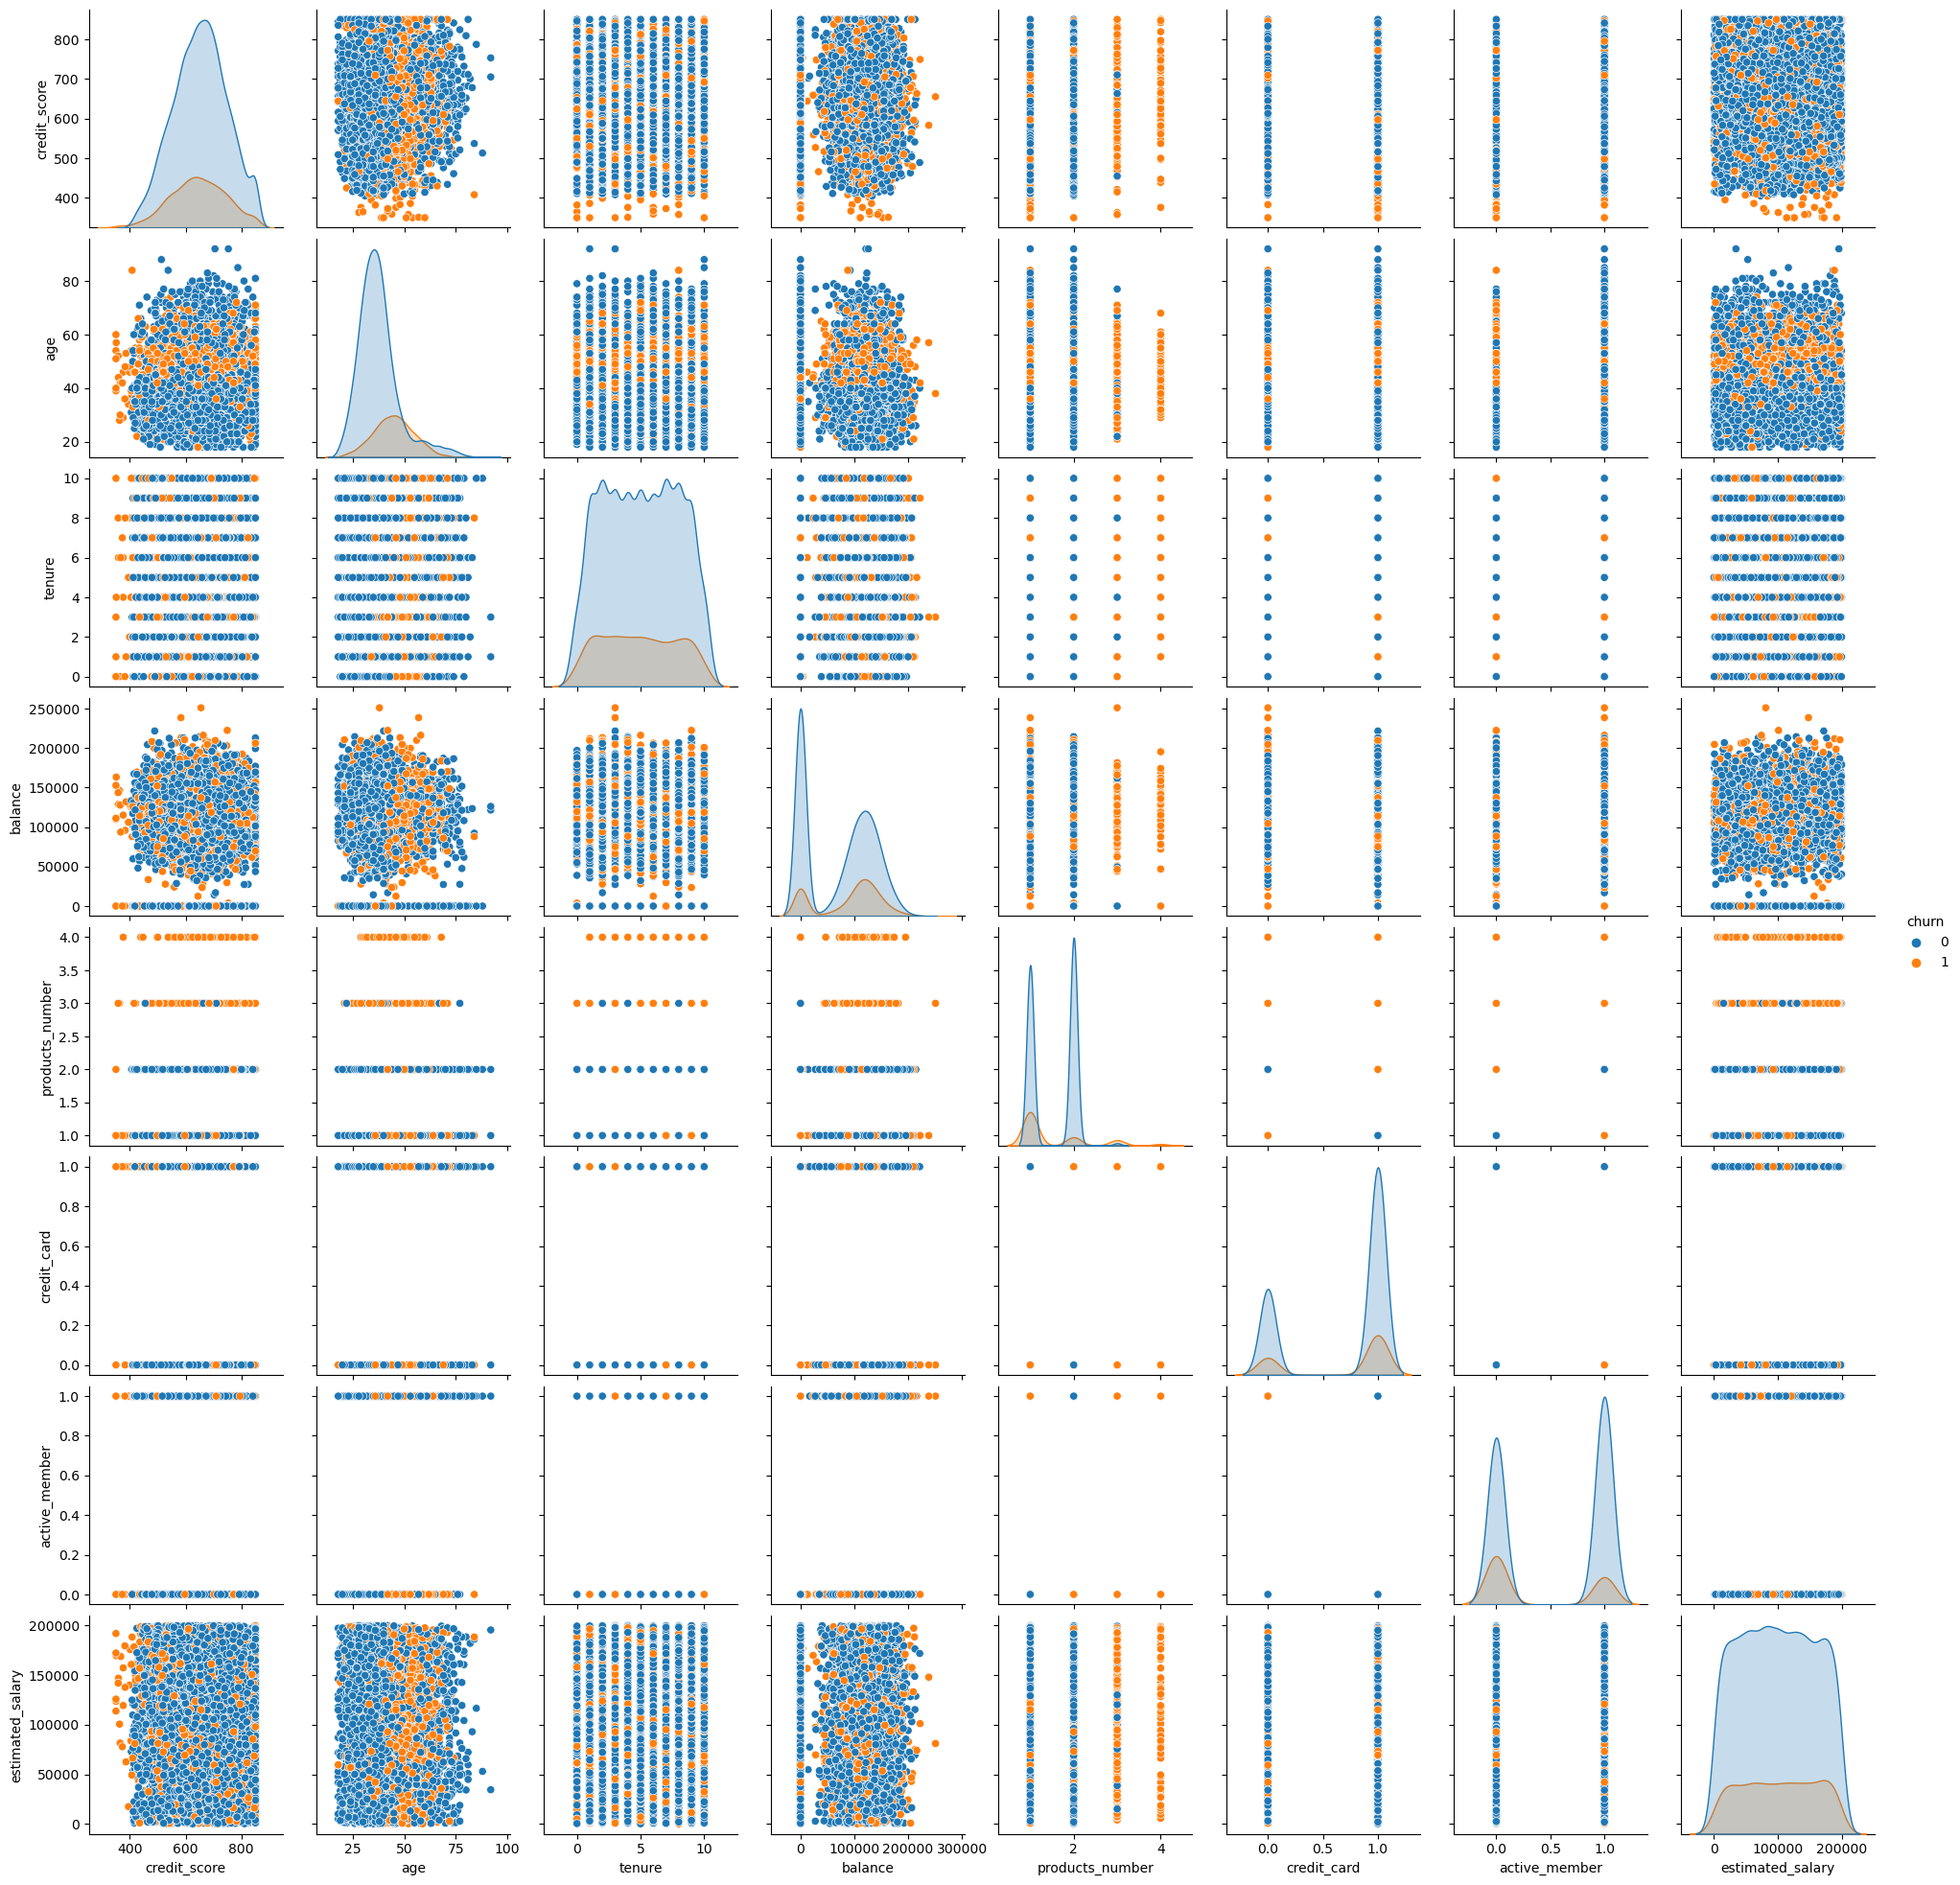

In [16]:
sns.pairplot(df,hue='churn')

In [17]:
#We can say that the dataset is non-linear.

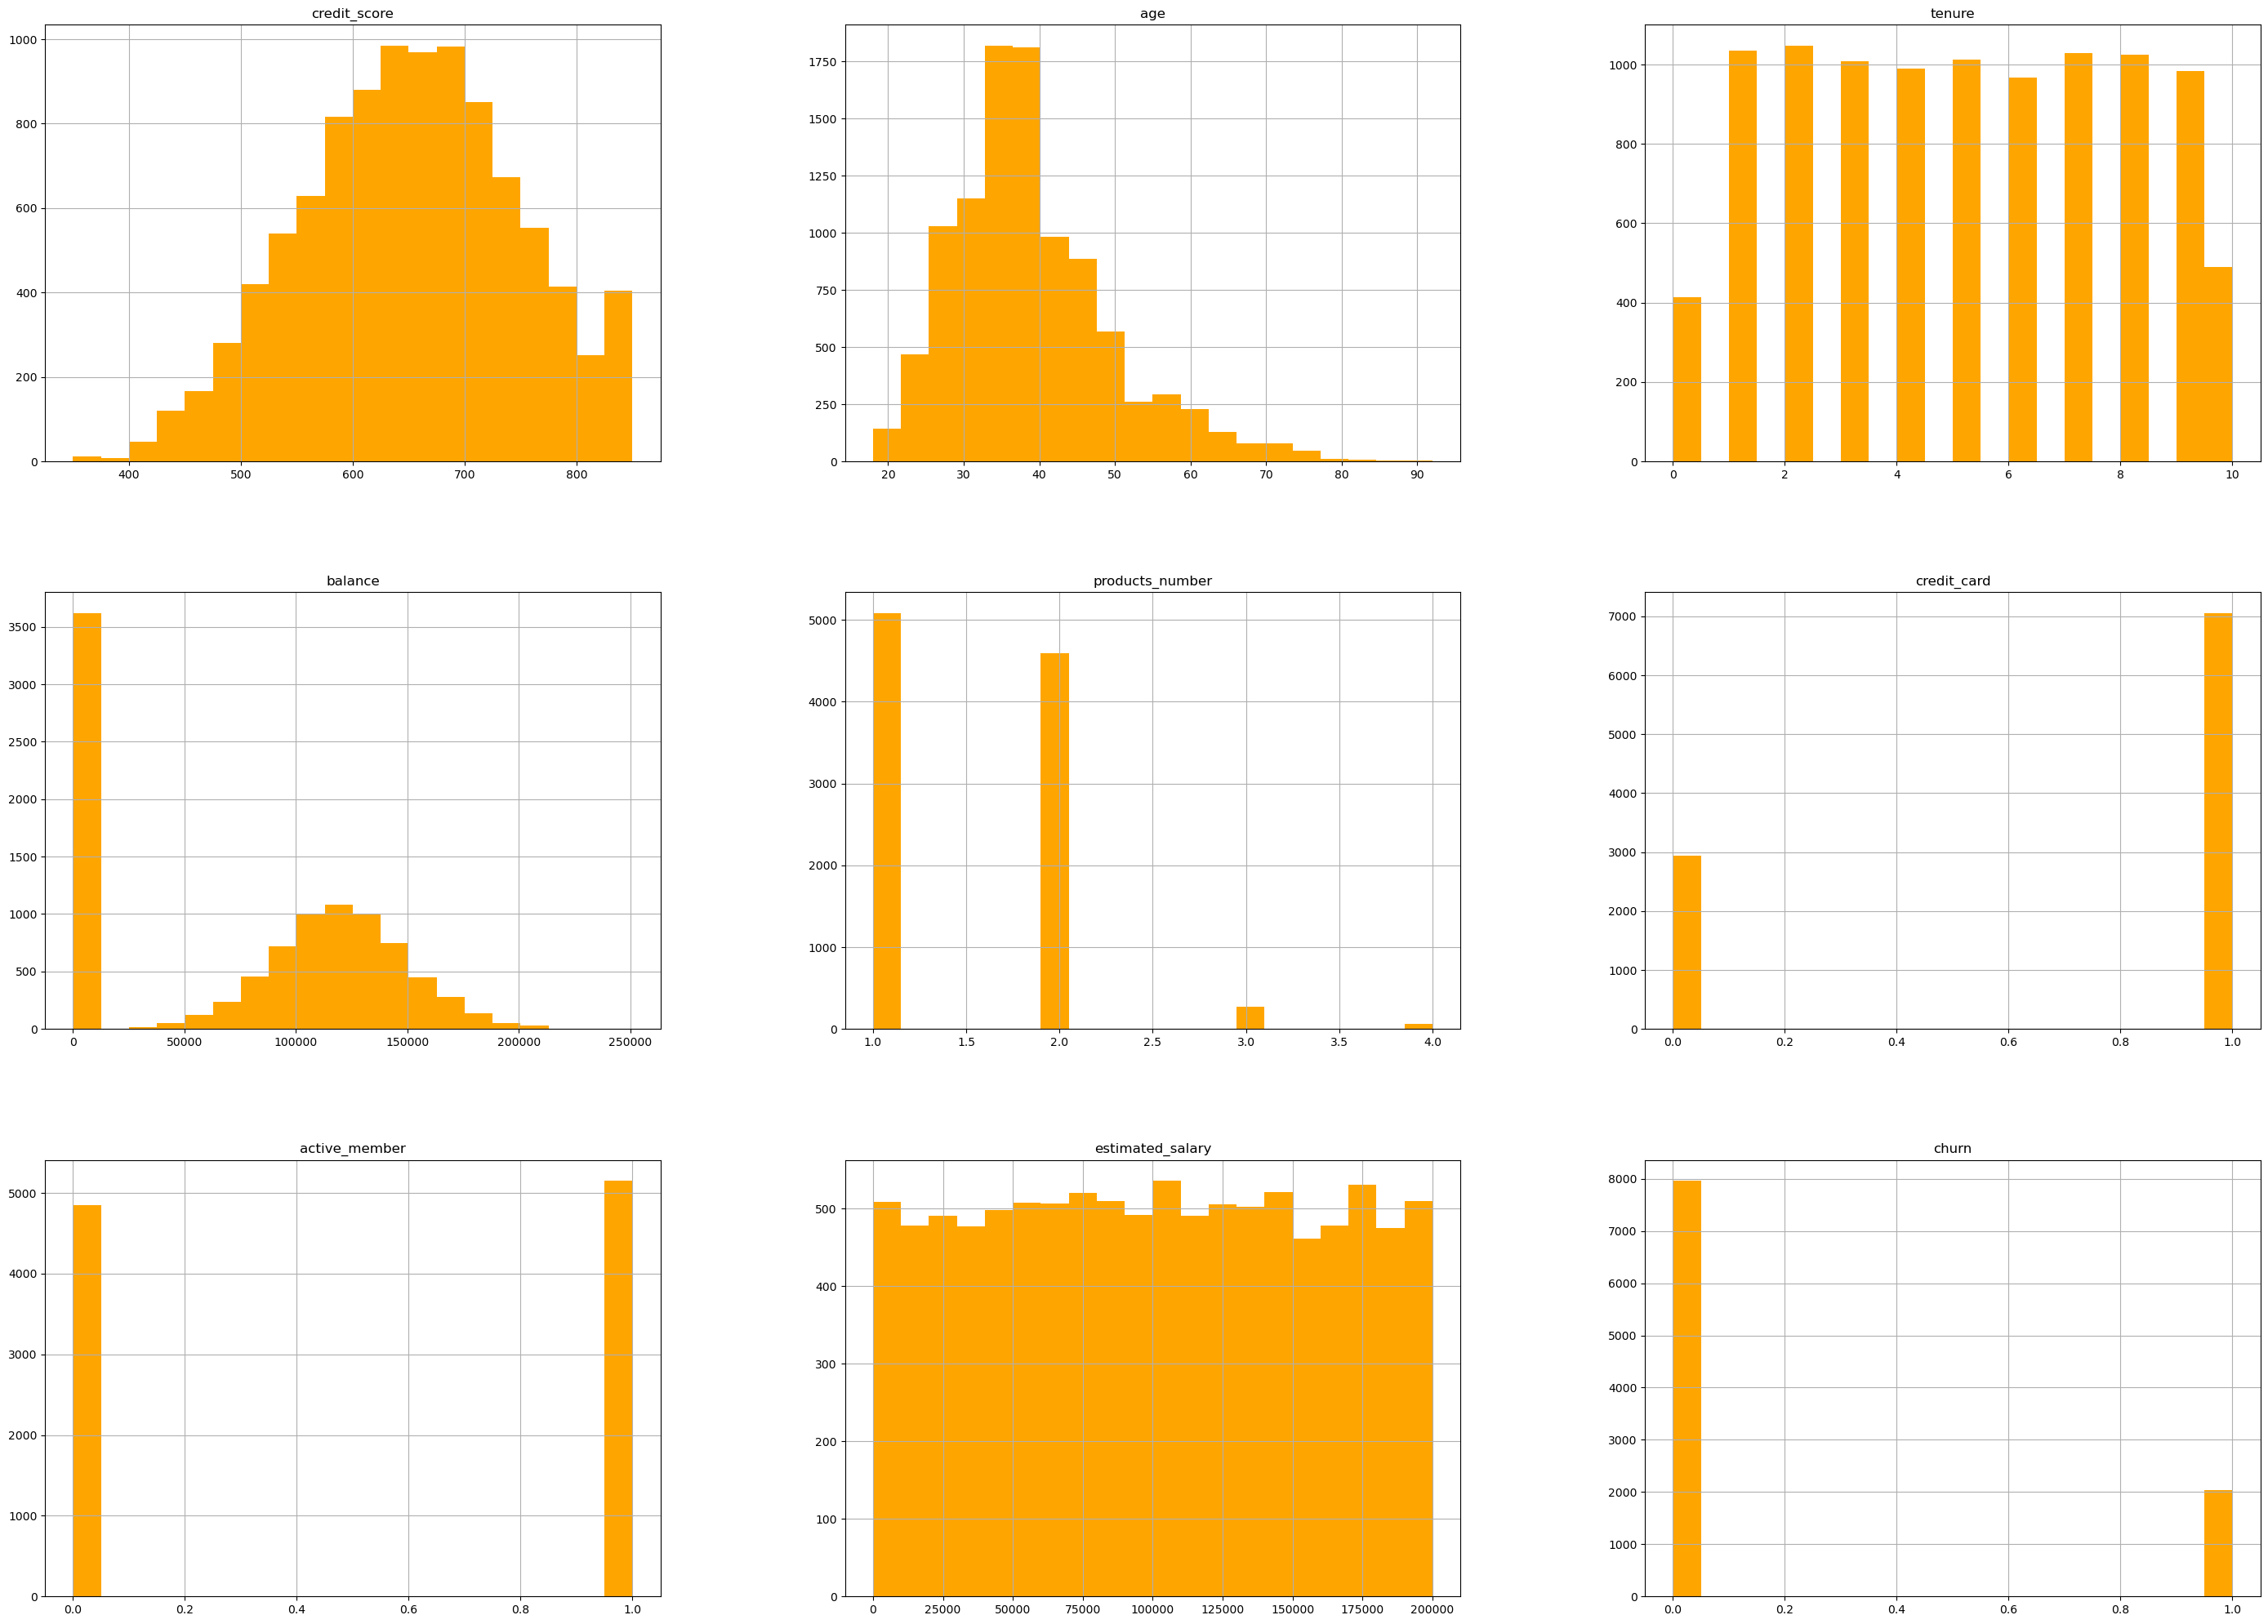

In [18]:
df.hist(bins=20,figsize=(35,25),color='orange')
plt.show()

In [19]:
sns.countplot(df['country'],hue=df['churn'])
plt.title("Country Wise Churn")

Text(0.5, 1.0, 'Country Wise Churn')

In [20]:
#According to this plot we can say that the number of clients who are left the bank is more than who's not left.
#Almost 4400 clients from France continues the bank & nearly 700 clients lefts.
#Almost 2000 clients from Spain continues the bank & nearly 500 clients lefts.
#Almost 1700 clients from Germany continues the bank & nearly 750 clients lefts.

In [21]:
sns.countplot(df['gender'],hue=df['churn'])
plt.title("Gender Wise Churn")

Text(0.5, 1.0, 'Gender Wise Churn')

In [22]:
#After seeing this plot we conclude that Female clients are more than male clients who left the bank.

In [23]:
plt.figure(figsize=(6,8))
sns.countplot(df['credit_score'],hue=df['churn'])

<AxesSubplot:xlabel='credit_score', ylabel='count'>

In [24]:
plt.figure(figsize=(6,8))
sns.countplot(df['age'],hue=df['churn'])

<AxesSubplot:xlabel='age', ylabel='count'>

In [25]:
plt.figure(figsize=(6,8))
sns.countplot(df['credit_card'],hue=df['churn'])

<AxesSubplot:xlabel='credit_card', ylabel='count'>

In [26]:
#Clients which are left the bank has less amount of usage credit card than compare with clients who continues.

In [27]:
plt.figure(figsize=(6,8))
sns.countplot(df['tenure'],hue=df['churn'])

<AxesSubplot:xlabel='tenure', ylabel='count'>

In [28]:
plt.figure(figsize=(6,8))
sns.countplot(df['products_number'],hue=df['churn'])

<AxesSubplot:xlabel='products_number', ylabel='count'>

In [29]:
plt.figure(figsize=(6,8)) 
sns.countplot(df['active_member'],hue=df['churn'])

<AxesSubplot:xlabel='active_member', ylabel='count'>

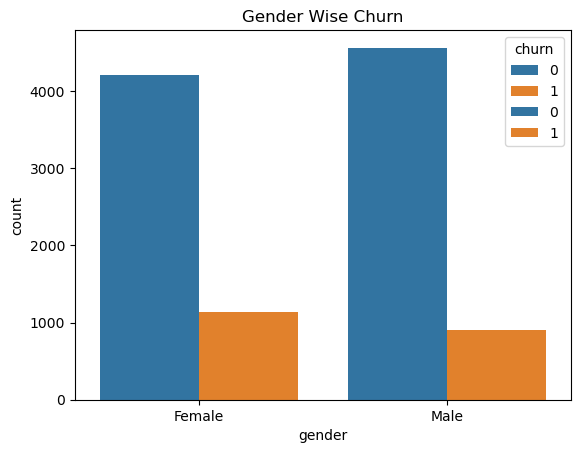

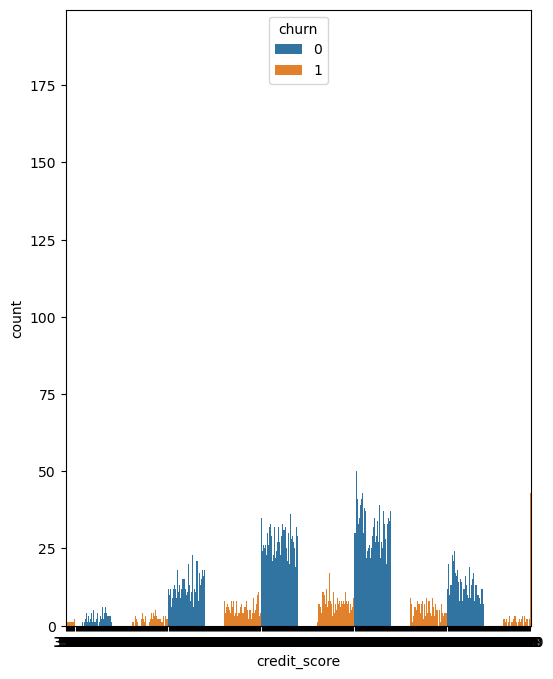

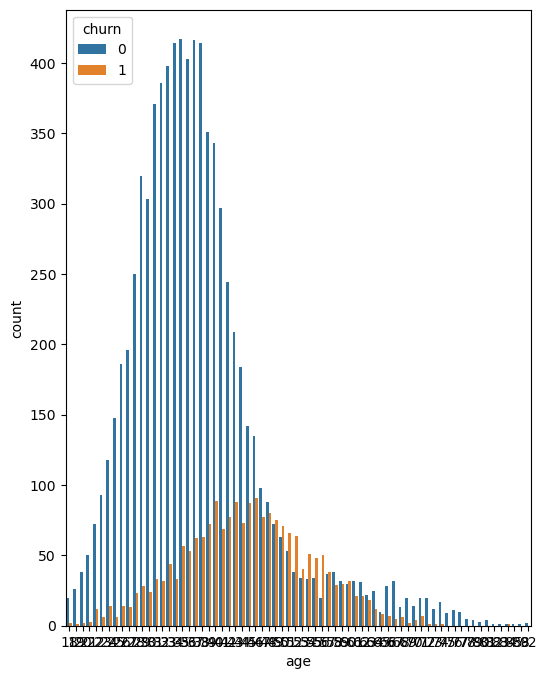

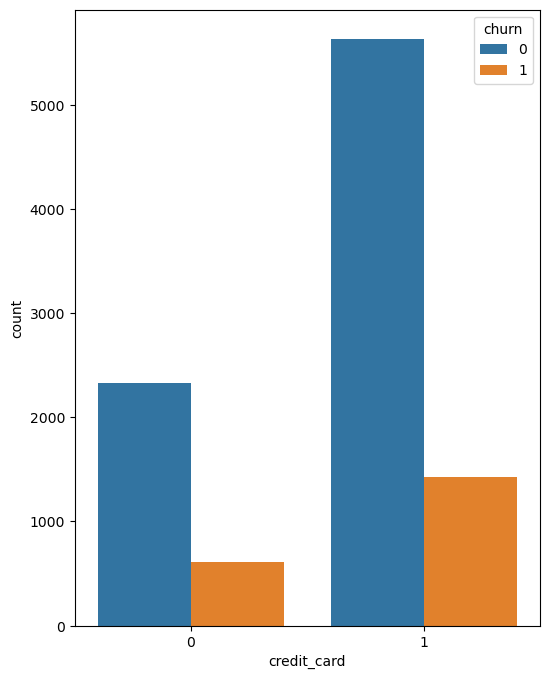

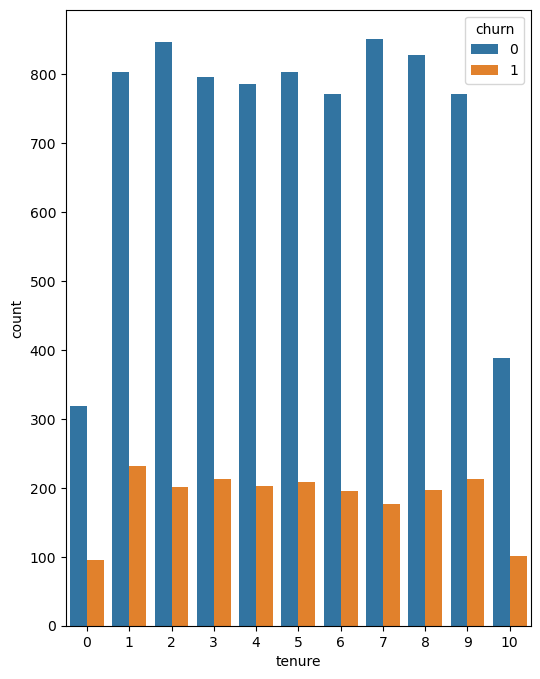

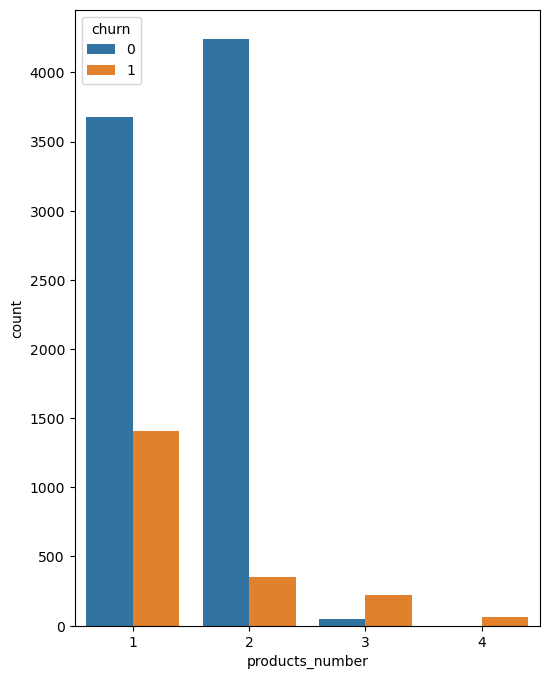

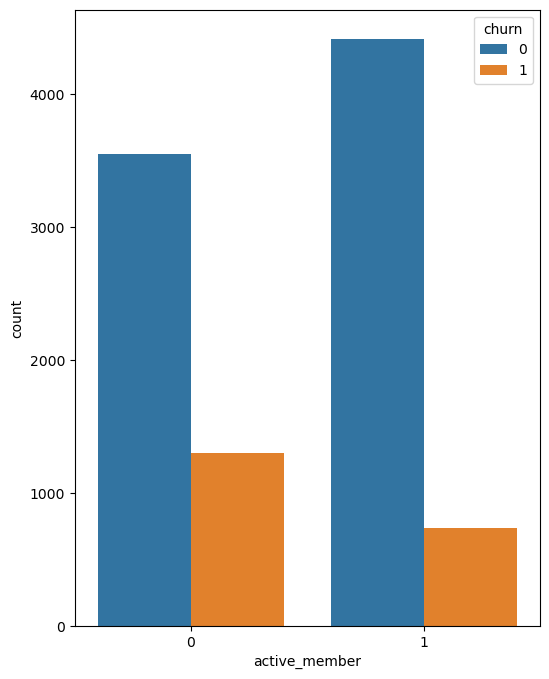

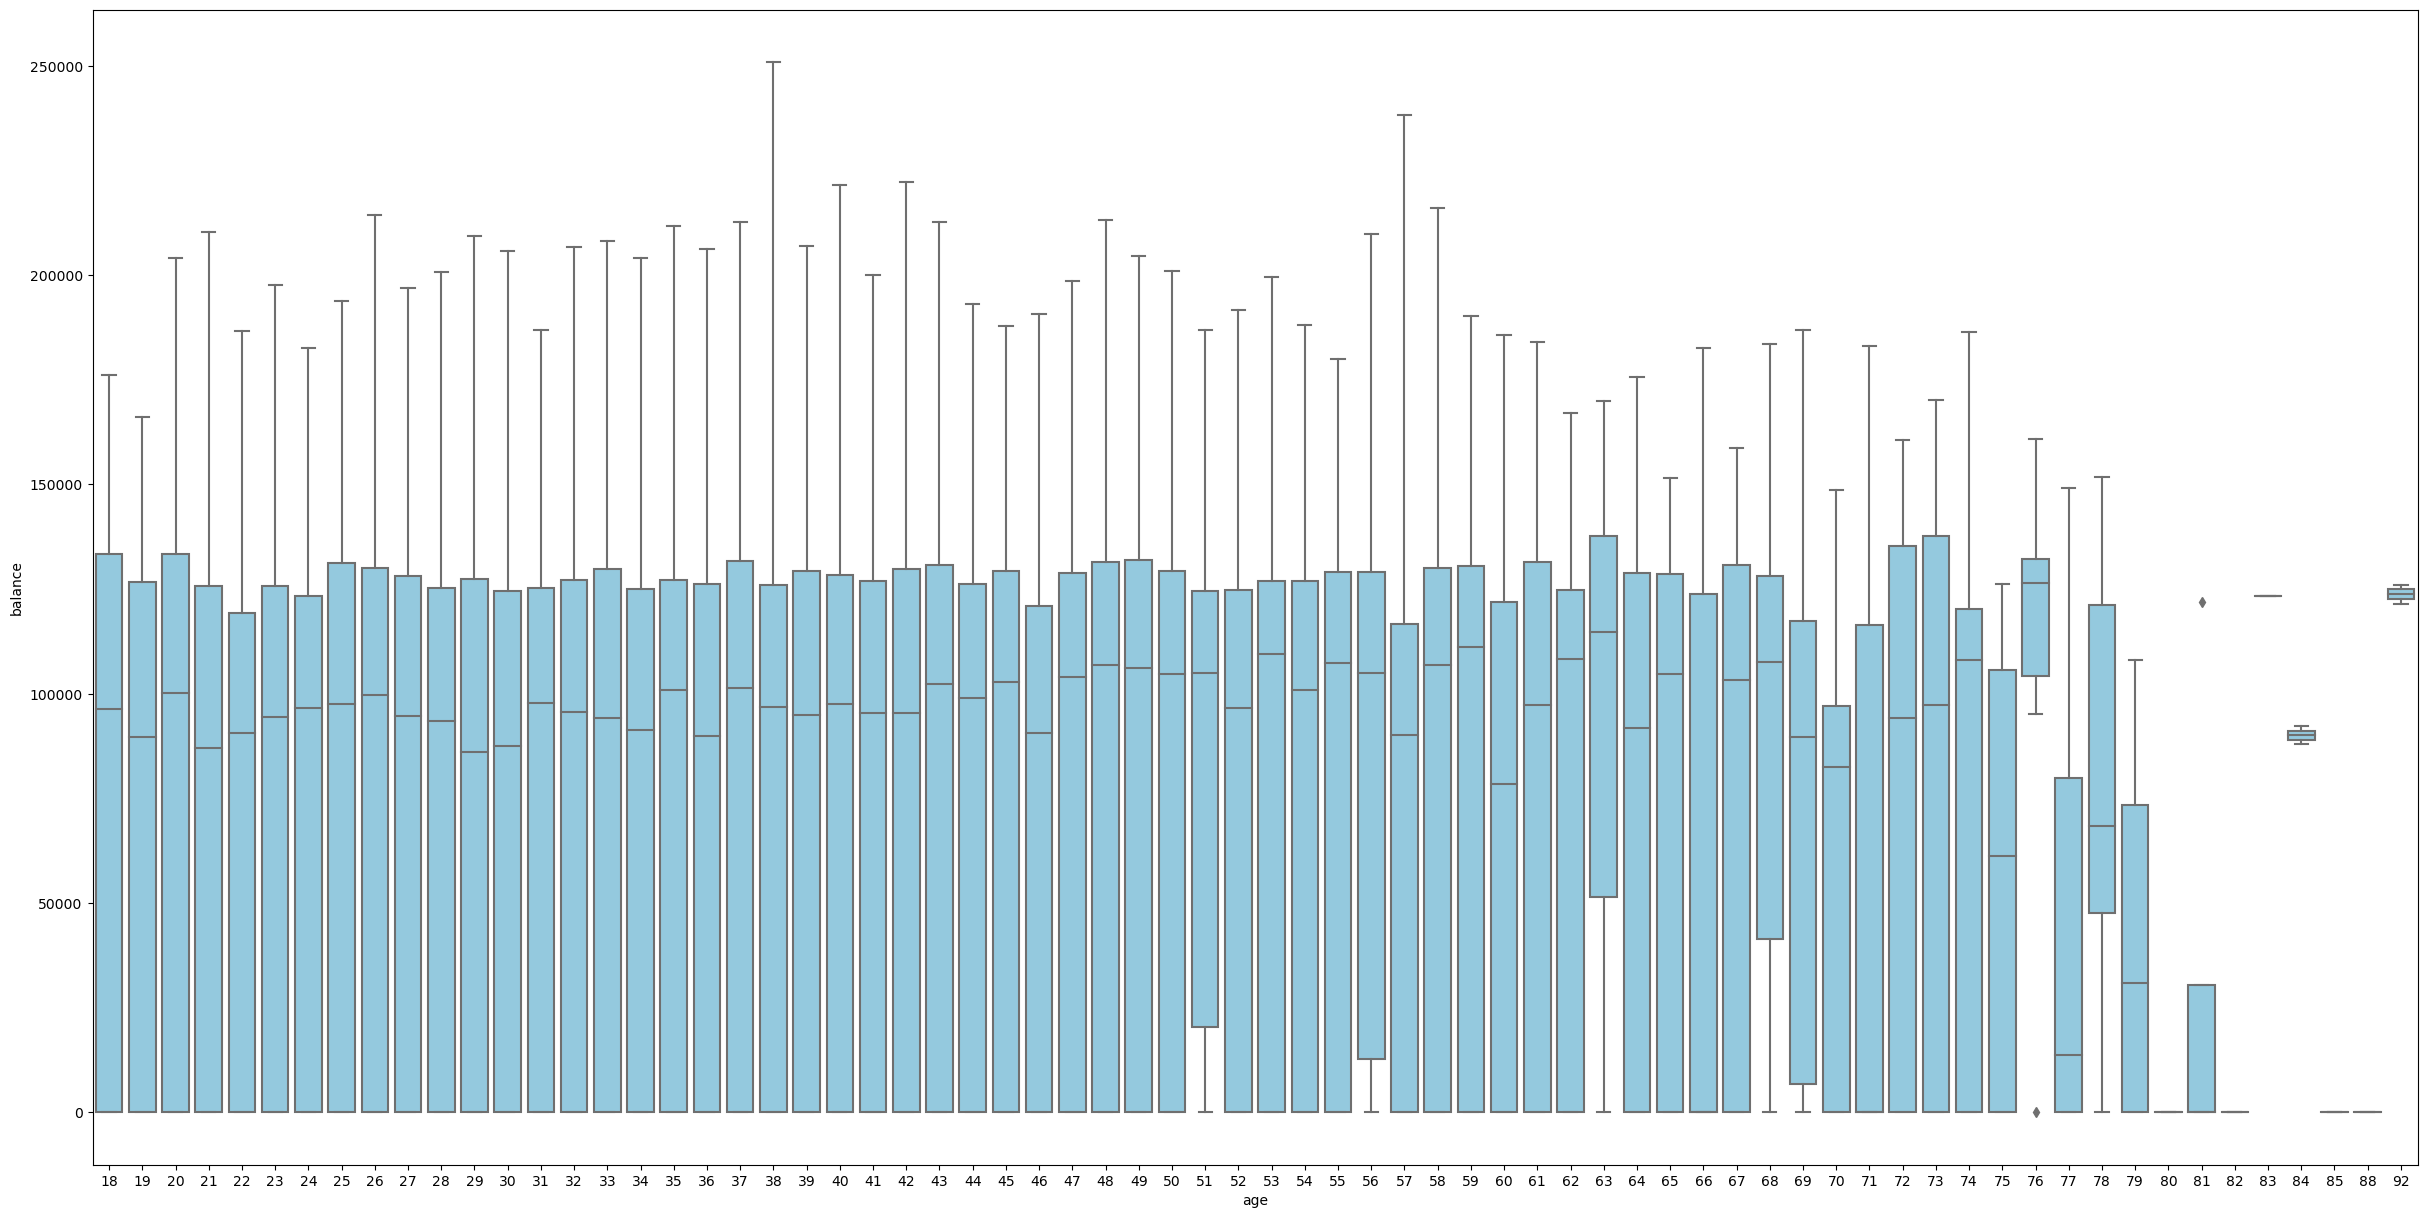

In [30]:
plt.figure(figsize=(30,15)) # width, height
sns.boxplot(x='age',y='balance',data=df,color='skyblue')
plt.show()

In [31]:
#Balance by age

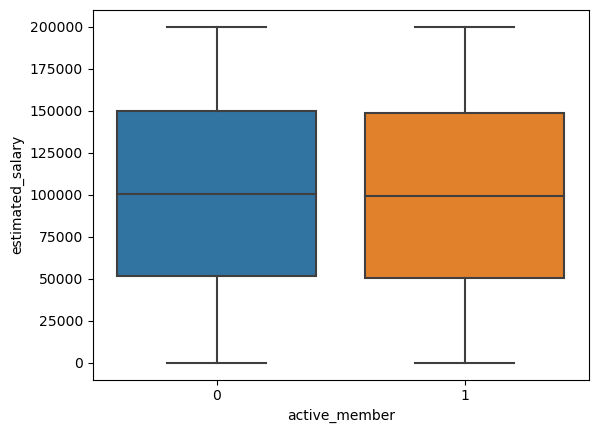

In [32]:
sns.boxplot(x='active_member',y='estimated_salary',data=df)
plt.show()

In [33]:
# active_member vs estimated_salary

In [34]:
corr=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [38]:
#We convert categorical data into numeric.

# Seperate features and target.

In [39]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
x

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [41]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [42]:
#The features are x and the target variable is y.

# Splitting dataset into train and test.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [45]:
x_train.shape

(8000, 10)

In [46]:
x_test.shape

(2000, 10)

In [47]:
y_train.shape

(8000,)

In [48]:
y_test.shape

(2000,)

In [49]:
#The data is equally splitted in training and testing phase.

# Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ssc=StandardScaler()

In [52]:
x_train=ssc.fit_transform(x_train)
x_test=ssc.transform(x_test)

In [53]:
#from sklearn.linear_model import LogisticRegression

In [54]:
#logreg=LogisticRegression()

In [55]:
#logreg.fit(x_train,y_train)

In [56]:
#y_pred_test=logreg.predict(x_test)

In [57]:
#y_pred_test

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [59]:
logreg=LogisticRegression()
knc=KNeighborsClassifier(n_neighbors=5)
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [60]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model 

In [61]:
mymodel(logreg)

train data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6378
           1       0.62      0.17      0.27      1622

    accuracy                           0.81      8000
   macro avg       0.72      0.57      0.58      8000
weighted avg       0.78      0.81      0.77      8000

test data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.61      0.18      0.28       415

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.78      0.81      0.76      2000



LogisticRegression()

In [62]:
mymodel(knc)

train data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6378
           1       0.81      0.51      0.63      1622

    accuracy                           0.88      8000
   macro avg       0.85      0.74      0.78      8000
weighted avg       0.87      0.88      0.87      8000

test data
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1585
           1       0.68      0.35      0.46       415

    accuracy                           0.83      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



KNeighborsClassifier()

In [63]:
mymodel(dt)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6378
           1       1.00      1.00      1.00      1622

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

test data
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1585
           1       0.48      0.49      0.49       415

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



DecisionTreeClassifier()

In [64]:
mymodel(rfc)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6378
           1       1.00      1.00      1.00      1622

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

test data
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.44      0.57       415

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



RandomForestClassifier()

In [65]:
#The accuracy for KNearestClassifier is highest which is 88% and the lowest one 79% is of Decision Tree.

In [66]:
#In Decision Tree and Random Forest the f1 score is 1. So we have to reduce it by hypertuning.

# Checking for Overfitting

In [67]:
dt.score(x_train,y_train)

1.0

In [68]:
dt.score(x_test,y_test)

0.786

In [69]:
#There is large difference between training and testing phase.
#We have to reduce it by using pruning techniques.

# Max Depth

In [70]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    y_pred_test=dt1.predict(x_test)
    ac=accuracy_score(y_test,y_pred_test)
    print(f'max_depth={i}  accuracy={ac}')

max_depth=1  accuracy=0.7925
max_depth=2  accuracy=0.828
max_depth=3  accuracy=0.838
max_depth=4  accuracy=0.846
max_depth=5  accuracy=0.853
max_depth=6  accuracy=0.855
max_depth=7  accuracy=0.853
max_depth=8  accuracy=0.8455
max_depth=9  accuracy=0.844
max_depth=10  accuracy=0.834
max_depth=11  accuracy=0.827
max_depth=12  accuracy=0.823
max_depth=13  accuracy=0.815
max_depth=14  accuracy=0.805
max_depth=15  accuracy=0.806
max_depth=16  accuracy=0.793
max_depth=17  accuracy=0.7945
max_depth=18  accuracy=0.7935
max_depth=19  accuracy=0.792
max_depth=20  accuracy=0.782
max_depth=21  accuracy=0.7845
max_depth=22  accuracy=0.789
max_depth=23  accuracy=0.7865
max_depth=24  accuracy=0.7865
max_depth=25  accuracy=0.791
max_depth=26  accuracy=0.7885
max_depth=27  accuracy=0.791
max_depth=28  accuracy=0.7915
max_depth=29  accuracy=0.792


In [71]:
#The accuracy falls down at the max_depth=14.
#We have to consider this point to re-build the model.

# Re-Building the model with max_depth as 14

In [72]:
dt2=DecisionTreeClassifier(max_depth=14)
mymodel(dt2)

train data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6378
           1       0.97      0.84      0.90      1622

    accuracy                           0.96      8000
   macro avg       0.96      0.92      0.94      8000
weighted avg       0.96      0.96      0.96      8000

test data
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1585
           1       0.53      0.47      0.50       415

    accuracy                           0.81      2000
   macro avg       0.70      0.68      0.69      2000
weighted avg       0.80      0.81      0.80      2000



DecisionTreeClassifier(max_depth=14)

In [73]:
dt2.score(x_train,y_train)

0.961875

In [74]:
dt2.score(x_test,y_test)

0.805

In [75]:
#Here also  the difference is high.
#We have to pune the model by min_samples_split.

# Min_Samples_Split

In [76]:
for i in range(2,50):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(x_train,y_train)
    y_pred_test=dt3.predict(x_test)
    ac=accuracy_score(y_test,y_pred_test)
    print(f'min_samples_split={i}  accuracy={ac}')

min_samples_split=2  accuracy=0.789
min_samples_split=3  accuracy=0.7895
min_samples_split=4  accuracy=0.7935
min_samples_split=5  accuracy=0.797
min_samples_split=6  accuracy=0.793
min_samples_split=7  accuracy=0.799
min_samples_split=8  accuracy=0.797
min_samples_split=9  accuracy=0.801
min_samples_split=10  accuracy=0.807
min_samples_split=11  accuracy=0.811
min_samples_split=12  accuracy=0.8115
min_samples_split=13  accuracy=0.8075
min_samples_split=14  accuracy=0.813
min_samples_split=15  accuracy=0.808
min_samples_split=16  accuracy=0.8115
min_samples_split=17  accuracy=0.8075
min_samples_split=18  accuracy=0.8145
min_samples_split=19  accuracy=0.816
min_samples_split=20  accuracy=0.818
min_samples_split=21  accuracy=0.8175
min_samples_split=22  accuracy=0.8175
min_samples_split=23  accuracy=0.821
min_samples_split=24  accuracy=0.823
min_samples_split=25  accuracy=0.823
min_samples_split=26  accuracy=0.8245
min_samples_split=27  accuracy=0.8265
min_samples_split=28  accuracy=0.82

In [77]:
#The accuracy falls down at the min_samples_split=17.
#We have to consider this point to re-build the model.

# Re-Building the model with min_samples_split as 17

In [78]:
dt4=DecisionTreeClassifier(min_samples_split=17)
mymodel(dt4)

train data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6378
           1       0.85      0.73      0.79      1622

    accuracy                           0.92      8000
   macro avg       0.89      0.85      0.87      8000
weighted avg       0.92      0.92      0.92      8000

test data
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1585
           1       0.55      0.47      0.51       415

    accuracy                           0.81      2000
   macro avg       0.71      0.68      0.69      2000
weighted avg       0.80      0.81      0.80      2000



DecisionTreeClassifier(min_samples_split=17)

In [79]:
dt4.score(x_train,y_train)

0.91975

In [80]:
dt4.score(x_test,y_test)

0.809

In [81]:
#Here also difference is much more so we have to prune the model by min_samples_leaf.

# Min_Samples_leaf

In [82]:
for i in range(1,50):
    dt5=DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(x_train,y_train)
    y_pred_test=dt5.predict(x_test)
    ac=accuracy_score(y_test,y_pred_test)
    print(f'min_samples_leaf={i}  accuracy={ac}')

min_samples_leaf=1  accuracy=0.791
min_samples_leaf=2  accuracy=0.81
min_samples_leaf=3  accuracy=0.811
min_samples_leaf=4  accuracy=0.8145
min_samples_leaf=5  accuracy=0.8175
min_samples_leaf=6  accuracy=0.824
min_samples_leaf=7  accuracy=0.83
min_samples_leaf=8  accuracy=0.835
min_samples_leaf=9  accuracy=0.83
min_samples_leaf=10  accuracy=0.8405
min_samples_leaf=11  accuracy=0.8405
min_samples_leaf=12  accuracy=0.8405
min_samples_leaf=13  accuracy=0.8435
min_samples_leaf=14  accuracy=0.842
min_samples_leaf=15  accuracy=0.8425
min_samples_leaf=16  accuracy=0.849
min_samples_leaf=17  accuracy=0.8495
min_samples_leaf=18  accuracy=0.8515
min_samples_leaf=19  accuracy=0.849
min_samples_leaf=20  accuracy=0.852
min_samples_leaf=21  accuracy=0.8565
min_samples_leaf=22  accuracy=0.8575
min_samples_leaf=23  accuracy=0.854
min_samples_leaf=24  accuracy=0.8545
min_samples_leaf=25  accuracy=0.8535
min_samples_leaf=26  accuracy=0.8545
min_samples_leaf=27  accuracy=0.8575
min_samples_leaf=28  accu

In [83]:
#Accuracy falls down at point min_samples_leaf=40.
#We can rebuild the model by prune the model.

# Re-Building the model with min_samples_leaf as 40

In [84]:
dt6=DecisionTreeClassifier(min_samples_leaf=40)
mymodel(dt6)

train data
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6378
           1       0.77      0.43      0.55      1622

    accuracy                           0.86      8000
   macro avg       0.82      0.70      0.73      8000
weighted avg       0.85      0.86      0.84      8000

test data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1585
           1       0.75      0.41      0.53       415

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



DecisionTreeClassifier(min_samples_leaf=40)

In [85]:
dt6.score(x_train,y_train)

0.85775

In [86]:
dt6.score(x_test,y_test)

0.849

In [87]:
mymodel(dt6)

train data
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6378
           1       0.77      0.43      0.55      1622

    accuracy                           0.86      8000
   macro avg       0.82      0.70      0.73      8000
weighted avg       0.85      0.86      0.84      8000

test data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1585
           1       0.75      0.41      0.53       415

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



DecisionTreeClassifier(min_samples_leaf=40)

In [88]:
#We reduce f1 score by hpt the model.

In [89]:
#Here we reduce the difference by pruning techniques.

In [90]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(rfc,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.857  0.8645 0.8555 0.8675 0.859 ]
Average Cross Validation score :0.8606999999999999


In [91]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
score=cross_val_score(rfc,x,y,cv=skf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.86   0.8555 0.861  0.8615 0.866 ]
Average Cross Validation score :0.8608


In [92]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
y_pred_train=rfc.predict(x_train)
y_pred_test=rfc.predict(x_test)

In [94]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6378
           1       1.00      1.00      1.00      1622

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test Data
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.79      0.45      0.57       415

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [95]:
rfc1=RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=12,min_samples_split=10,random_state=500)
rfc1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=10,
                       n_estimators=200, random_state=500)

In [96]:
y_pred_train=rfc1.predict(x_train)
y_pred_test=rfc1.predict(x_test)

In [97]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6378
           1       0.93      0.56      0.70      1622

    accuracy                           0.90      8000
   macro avg       0.91      0.78      0.82      8000
weighted avg       0.90      0.90      0.89      8000

Test Data
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.84      0.43      0.57       415

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [98]:
mymodel(rfc1)

train data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6378
           1       0.93      0.56      0.70      1622

    accuracy                           0.90      8000
   macro avg       0.91      0.78      0.82      8000
weighted avg       0.90      0.90      0.89      8000

test data
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.84      0.43      0.57       415

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=10,
                       n_estimators=200, random_state=500)

In [99]:
#By hpt we reduce the f1 score in training phase.

In [100]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.metrics import classification_report

In [101]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred_test=model.predict(x_test)
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    cr=classification_report(y_test,y_pred_test)
    
    print(f'Training Accuracy:{train_score} Testing Accuracy:{test_score}')
    print(f'Classification Report:{cr}')

In [102]:
mymodel(BernoulliNB()) 

Training Accuracy:0.8105 Testing Accuracy:0.8115
Classification Report:              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1585
           1       0.61      0.26      0.37       415

    accuracy                           0.81      2000
   macro avg       0.72      0.61      0.63      2000
weighted avg       0.78      0.81      0.78      2000



In [103]:
mymodel(GaussianNB())

Training Accuracy:0.830875 Testing Accuracy:0.8285
Classification Report:              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1585
           1       0.80      0.23      0.36       415

    accuracy                           0.83      2000
   macro avg       0.81      0.61      0.63      2000
weighted avg       0.82      0.83      0.79      2000



In [104]:
#The accuracy for Gaussian Naive Bayes is more than Bernoulli Naive Bayes.

In [ ]:
s